In [24]:
import numpy as np
from utils import get_lenet
from load_mnist import load_mnist
from scipy.io import loadmat
from conv_net import convnet_forward
from init_convnet import init_convnet
import matplotlib.pyplot as plt
import os

In [25]:
resultsdir = '../results'
os.makedirs(resultsdir, exist_ok=True)

In [2]:
# Load the model architecture
layers = get_lenet()
params = init_convnet(layers)

In [4]:
# Load the network
data = loadmat('../results/lenet.mat')
params_raw = data['params']

In [5]:
for params_idx in range(len(params)):
    raw_w = params_raw[0,params_idx][0,0][0]
    raw_b = params_raw[0,params_idx][0,0][1]
    assert params[params_idx]['w'].shape == raw_w.shape, 'weights do not have the same shape'
    assert params[params_idx]['b'].shape == raw_b.shape, 'biases do not have the same shape'
    params[params_idx]['w'] = raw_w
    params[params_idx]['b'] = raw_b

In [6]:
# Load data
fullset = False
xtrain, ytrain, xvalidate, yvalidate, xtest, ytest = load_mnist(fullset)
m_train = xtrain.shape[1]

In [7]:
m_train

2500

In [8]:
batch_size = 1
layers[0]['batch_size'] = batch_size

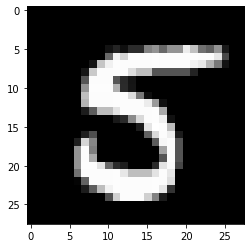

In [19]:
img = xtest[:,3]
img = np.reshape(img, (28, 28), order='F')
plt.imshow(img.T, cmap='gray')
plt.show()

In [20]:
output = convnet_forward(params, layers, xtest[:,3:4])
output_1 = np.reshape(output[0]['data'], (28,28), order='F')

In [ ]:
fig, ax = plt.subplots(1,1)
ax.imshow(output_1.T, cmap='gray')
ax.set_axis_off()

fig.suptitle('Original Image - 5')
filename = f"{resultsdir}/original_image_5.png"
plt.savefig(filename)

In [54]:
output[1]['height'] * output[1]['width']

576

In [59]:
output[1]['data'].shape

(11520, 1)

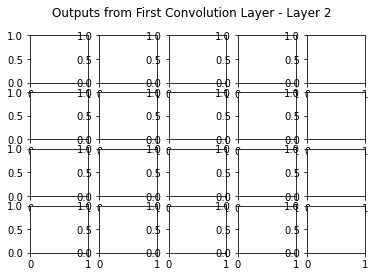

In [48]:
fig, ax = plt.subplots(4,5)

num = output[1]['channel']
data_size = output[1]['height'] * output[1]['width']

#4x5 sub plot
for row in range(4):
    for col in range(5):
        img_data = output[1]['data'][]


        ax[row,col].imshow() #to be filled in
        ax[row,col].set_axis_off()

fig.suptitle("Outputs from First Convolution Layer - Layer 2")
filename = f"{resultsdir}/second_layer_outputs.png"
plt.savefig(filename)